# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [57]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [21]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [22]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [23]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [24]:
# Which columns contain the features of the websites?
websites.columns.tolist()

['URL',
 'URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CHARSET',
 'SERVER',
 'CONTENT_LENGTH',
 'WHOIS_COUNTRY',
 'WHOIS_STATEPRO',
 'WHOIS_REGDATE',
 'WHOIS_UPDATED_DATE',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'Type']

In [25]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
type

type

In [26]:
# 0 for bening 1 for maliciuos websites
unique_types = websites['Type'].unique()
unique_types

array([1, 0], dtype=int64)

In [29]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
#Si, CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

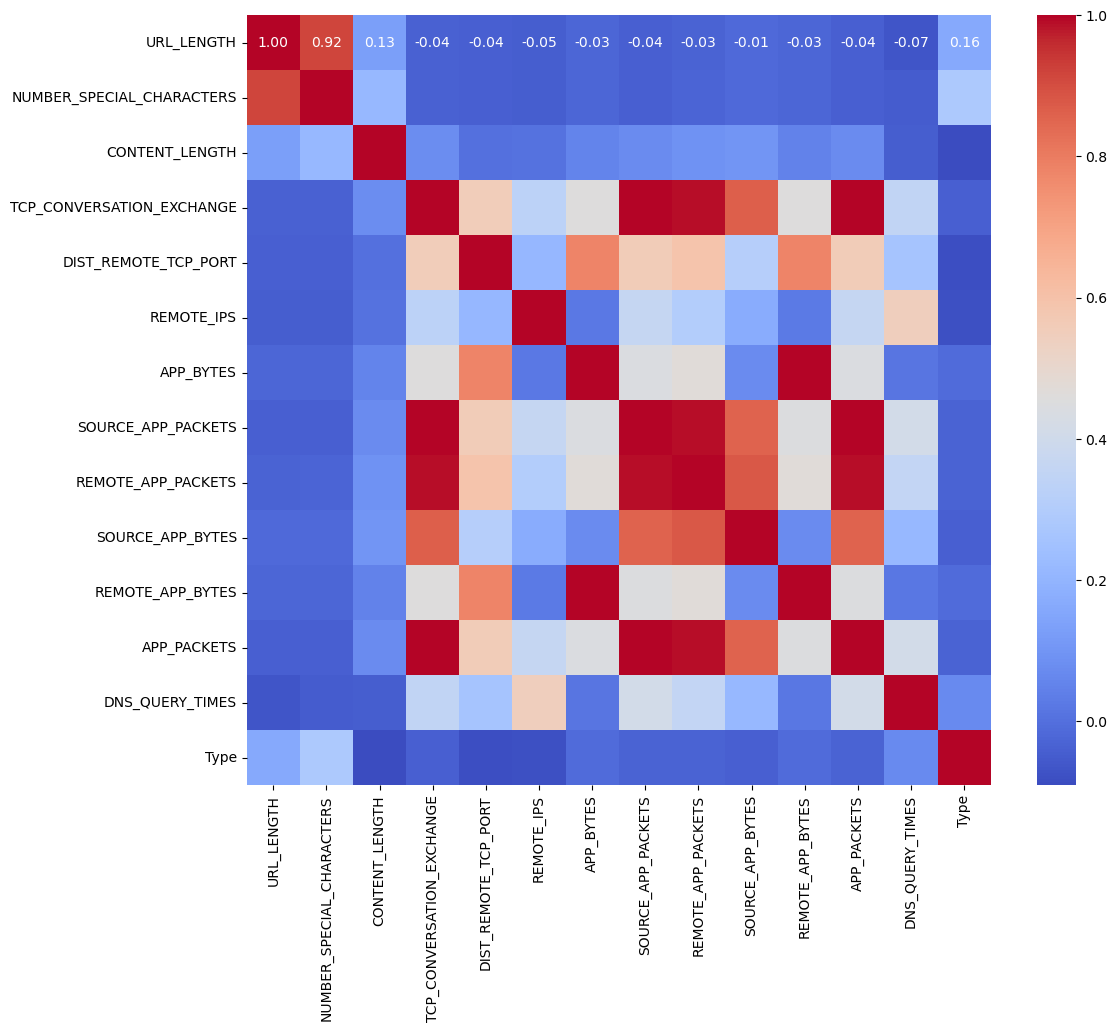

In [30]:
websites_numeric = websites.select_dtypes(include=[np.number])
correlation_matrix = websites_numeric.corr()
plt.figure(figsize=(12, 10))

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Muestra el mapa de calor
plt.show()

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [31]:
#! pip install xgboost

In [32]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [33]:
xgb.fit(X,y)

NameError: name 'xgb' is not defined

In [34]:
sort_idx = xgb.feature_importances_.argsort()

NameError: name 'xgb' is not defined

In [35]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

NameError: name 'sort_idx' is not defined

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

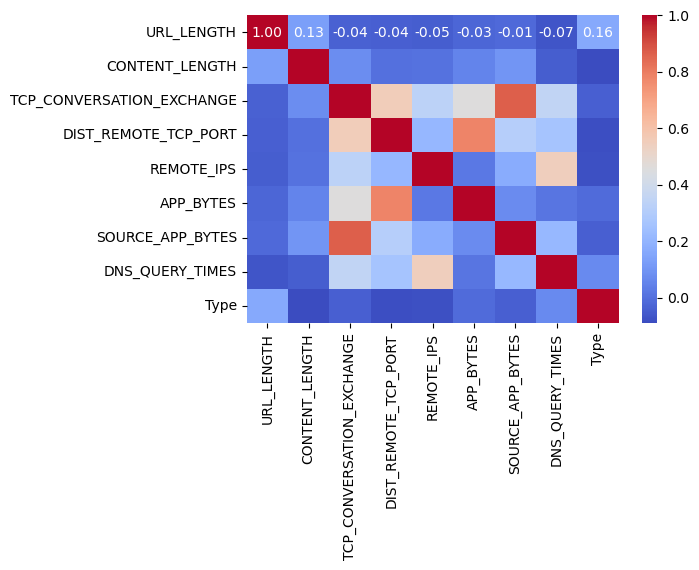

In [36]:
websites_numeric = websites.select_dtypes(include=[np.number])

highly_correlated = set()
correlation_matrix = websites_numeric.corr()

for i in range(len(correlation_matrix.columns)):  # Buscar pares de columnas con una correlación absoluta superior a 0.9
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Eliminar estas columnas
websites_numeric = websites_numeric.drop(columns=list(highly_correlated))

# Recalcular la matriz de correlación con las columnas restantes
correlation_matrix = websites_numeric.corr()

# Crear y mostrar el mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()# Your code here

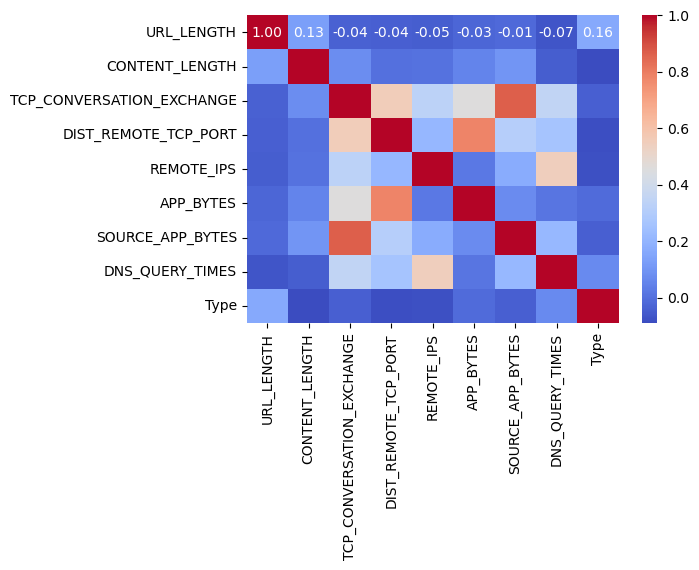

In [37]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
correlation_matrix = websites_numeric.corr()


pairs_to_drop = set()# Identificar pares de columnas altamente correlacionadas (e.g., correlación > 0.9)
cols = correlation_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if np.abs(correlation_matrix.iloc[i, j]) > 0.9:
            pairs_to_drop.add(cols[j])


columns_to_drop = list(pairs_to_drop)[:4]  


websites_reduced = websites_numeric.drop(columns=columns_to_drop)# Eliminar las columnas del DataFrame
new_correlation_matrix = websites_reduced.corr()# Recalcular la matriz de correlación para verificar

plt.figure(figsize=(6, 4))# Mostrar el nuevo mapa de calor
sns.heatmap(new_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [38]:
# Your code here
missing_values = websites_reduced.isnull().sum()
missing_values

URL_LENGTH                     0
CONTENT_LENGTH               812
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [40]:
# Firts we will drop the columns with more than 50% of missing data
threshold = 0.5 * len(websites_reduced)
websites_cleaned = websites_reduced.dropna(thresh=threshold, axis=1)
dropped_columns = set(websites_reduced.columns) - set(websites_cleaned.columns)

websites_cleaned.head(), dropped_columns

(   URL_LENGTH  CONTENT_LENGTH  TCP_CONVERSATION_EXCHANGE  \
 0          16           263.0                          7   
 1          16         15087.0                         17   
 2          16           324.0                          0   
 3          17           162.0                         31   
 4          17        124140.0                         57   
 
    DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  \
 0                     0           2        700              1153   
 1                     7           4       1230              1265   
 2                     0           0          0                 0   
 3                    22           3       3812             18784   
 4                     2           5       4278            129889   
 
    DNS_QUERY_TIMES  Type  
 0              2.0     1  
 1              0.0     0  
 2              0.0     0  
 3              8.0     0  
 4              4.0     0  ,
 set())

In [41]:
# Now we will drop the rows with missing data
websites_cleaned = websites_cleaned.dropna()
websites_cleaned.head()

,URL_LENGTH,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,16,263.0,7,0,2,700,1153,2.0,1
1,16,15087.0,17,7,4,1230,1265,0.0,0
2,16,324.0,0,0,0,0,0,0.0,0
3,17,162.0,31,22,3,3812,18784,8.0,0
4,17,124140.0,57,2,5,4278,129889,4.0,0


#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [42]:
# Examine missing values in each column
missing_values_cleaned = websites_cleaned.isnull().sum()
missing_values_cleaned

URL_LENGTH                   0
CONTENT_LENGTH               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [43]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [50]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: good_country.get(x, 'Unknown'))
websites.head()



,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,Unknown,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,Unknown,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,Unknown,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [51]:
websites.WHOIS_COUNTRY.unique()

array(['Unknown', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [52]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

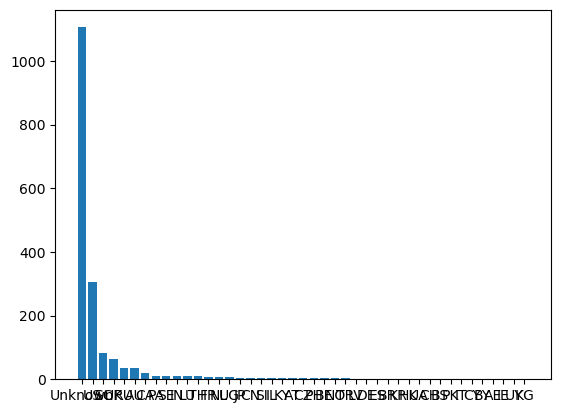

<Figure size 1500x1500 with 0 Axes>

In [53]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [54]:
# Your code here
top_10_countries = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US         1106
Unknown     306
OTHER       100
CA           84
ES           63
UK           35
AU           35
PA           21
JP           11
IN           10
CN           10
Name: count, dtype: int64

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [55]:
# Your code here
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_cleaned = websites.drop(columns=columns_to_drop)
websites_cleaned.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,Unknown,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,Unknown,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,Unknown,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,57,2,5,4278,61,62,129889,4586,61,4.0,0


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [58]:
# Your code here
le_country = LabelEncoder()
le_url = LabelEncoder()
le_charset = LabelEncoder()
le_server = LabelEncoder()

websites_cleaned['WHOIS_COUNTRY'] = le_country.fit_transform(websites_cleaned['WHOIS_COUNTRY'])
websites_cleaned['URL'] = le_url.fit_transform(websites_cleaned['URL'])
websites_cleaned['CHARSET'] = le_charset.fit_transform(websites_cleaned['CHARSET'])
websites_cleaned['SERVER'] = le_server.fit_transform(websites_cleaned['SERVER'])

websites_cleaned.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574,16,7,3,199,263.0,10,7,0,2,700,9,10,1153,832,9,2.0,1
1,796,16,6,2,61,15087.0,10,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,1479,16,6,4,115,324.0,10,0,0,0,0,0,0,0,0,0,0.0,0
3,132,17,6,1,199,162.0,9,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,982,17,6,2,238,124140.0,9,57,2,5,4278,61,62,129889,4586,61,4.0,0


#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [59]:
# Your code here
websites_final = websites_cleaned.drop(columns=['URL'])
websites_final.head(), websites_final.dtypes

(   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
 0          16                          7        3     199           263.0   
 1          16                          6        2      61         15087.0   
 2          16                          6        4     115           324.0   
 3          17                          6        1     199           162.0   
 4          17                          6        2     238        124140.0   
 
    WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
 0             10                          7                     0           2   
 1             10                         17                     7           4   
 2             10                          0                     0           0   
 3              9                         31                    22           3   
 4              9                         57                     2           5   
 
    APP_BYTES  SOURCE_APP_PACKETS  R

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [60]:
# Your code here
unique_charset_values = websites_final['CHARSET'].value_counts()

unique_charset_values

CHARSET
2    676
1    427
5    379
4    155
3    134
8      7
6      1
0      1
7      1
Name: count, dtype: int64

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [61]:
# Your code here
unique_server_values = websites_final['SERVER'].value_counts()

unique_server_values

SERVER
7      386
199    211
238    176
115    113
147     94
      ... 
47       1
150      1
55       1
14       1
31       1
Name: count, Length: 239, dtype: int64

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [62]:
# Count `SERVER` value counts here
unique_server_values

SERVER
7      386
199    211
238    176
115    113
147     94
      ... 
47       1
150      1
55       1
14       1
31       1
Name: count, Length: 239, dtype: int64

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [63]:
# Your code here
website_dummy = pd.get_dummies(websites_final, drop_first=True)

website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,3,199,263.0,10,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,2,61,15087.0,10,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,4,115,324.0,10,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,1,199,162.0,9,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,2,238,124140.0,9,57,2,5,4278,61,62,129889,4586,61,4.0,0


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [64]:
# Your code here
website_dummy_info = website_dummy.info()
website_dummy_head = website_dummy.head()

website_dummy_info, website_dummy_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CHARSET                    1781 non-null   int32  
 3   SERVER                     1781 non-null   int32  
 4   CONTENT_LENGTH             969 non-null    float64
 5   WHOIS_COUNTRY              1781 non-null   int32  
 6   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 7   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 8   REMOTE_IPS                 1781 non-null   int64  
 9   APP_BYTES                  1781 non-null   int64  
 10  SOURCE_APP_PACKETS         1781 non-null   int64  
 11  REMOTE_APP_PACKETS         1781 non-null   int64  
 12  SOURCE_APP_BYTES           1781 non-null   int64  
 13  REMOTE_APP_BYTES           1781 non-null   int64

(None,
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
 0          16                          7        3     199           263.0   
 1          16                          6        2      61         15087.0   
 2          16                          6        4     115           324.0   
 3          17                          6        1     199           162.0   
 4          17                          6        2     238        124140.0   
 
    WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
 0             10                          7                     0           2   
 1             10                         17                     7           4   
 2             10                          0                     0           0   
 3              9                         31                    22           3   
 4              9                         57                     2           5   
 
    APP_BYTES  SOURCE_APP_PAC

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [66]:
from sklearn.model_selection import train_test_split

# Your code here:
website_dummy['target'] = np.random.randint(0, 2, size=len(website_dummy))

X = website_dummy.drop(columns=['target'])
y = website_dummy['target']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [68]:
from sklearn.linear_model import LogisticRegression
# Your code here:
logistic_model = LogisticRegression()

# Verificar la inicialización del modelo
logistic_model

LogisticRegression()

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [74]:
nan_entrenamiento = X_entrenamiento.isnull().sum()
nan_prueba = X_prueba.isnull().sum()

nan_entrenamiento, nan_prueba

(URL_LENGTH                     0
 NUMBER_SPECIAL_CHARACTERS      0
 CHARSET                        0
 SERVER                         0
 CONTENT_LENGTH               638
 WHOIS_COUNTRY                  0
 TCP_CONVERSATION_EXCHANGE      0
 DIST_REMOTE_TCP_PORT           0
 REMOTE_IPS                     0
 APP_BYTES                      0
 SOURCE_APP_PACKETS             0
 REMOTE_APP_PACKETS             0
 SOURCE_APP_BYTES               0
 REMOTE_APP_BYTES               0
 APP_PACKETS                    0
 DNS_QUERY_TIMES                1
 Type                           0
 dtype: int64,
 URL_LENGTH                     0
 NUMBER_SPECIAL_CHARACTERS      0
 CHARSET                        0
 SERVER                         0
 CONTENT_LENGTH               174
 WHOIS_COUNTRY                  0
 TCP_CONVERSATION_EXCHANGE      0
 DIST_REMOTE_TCP_PORT           0
 REMOTE_IPS                     0
 APP_BYTES                      0
 SOURCE_APP_PACKETS             0
 REMOTE_APP_PACKETS             0

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [75]:
nan_values = website_dummy.isnull().sum()
nan_values

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         0
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
target                         0
dtype: int64

In [76]:
website_dummy['CONTENT_LENGTH'].fillna(website_dummy['CONTENT_LENGTH'].mean(), inplace=True)

nan_values_after_imputation = website_dummy.isnull().sum()
nan_values_after_imputation

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
target                       0
dtype: int64

In [77]:
website_dummy['DNS_QUERY_TIMES'].fillna(website_dummy['DNS_QUERY_TIMES'].mean(), inplace=True)

nan_values_after_imputation = website_dummy.isnull().sum()
nan_values_after_imputation

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
target                       0
dtype: int64

In [80]:
logistic_model.fit(X_entrenamiento, y_entrenamiento)

y_pred = logistic_model.predict(X_prueba)
y_pred

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [81]:
# Your code here
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_prueba, y_pred)

conf_matrix = confusion_matrix(y_prueba, y_pred)

class_report = classification_report(y_prueba, y_pred)

accuracy, conf_matrix, class_report

NameError: name 'y_pred' is not defined

In [83]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier()

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
decision_tree_model.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
y_pred_tree = decision_tree_model.predict(X_prueba)

# Calcular la precisión
accuracy_tree = accuracy_score(y_prueba, y_pred_tree)

# Calcular la matriz de confusión
conf_matrix_tree = confusion_matrix(y_prueba, y_pred_tree)

# Generar el reporte de clasificación
class_report_tree = classification_report(y_prueba, y_pred_tree)

accuracy_tree, conf_matrix_tree, class_report_tree

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [ ]:
# Your code here:

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [ ]:
# Your code here:


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [ ]:
# Your code here:

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: